# Basic Image Processing

#### I have taken an image 'sky.png' which is stored in the 'image-processing' directory, and initially I will find the three brightest points (not spots) in that image.

In [1]:
# Importing the required libraries
import numpy as np
import skimage.io
import skimage.color
import matplotlib.pyplot as plt

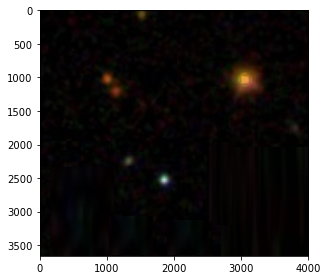

In [2]:
image = skimage.io.imread("sky.png")            # Reading the image as 3D array
skimage.io.imshow(image)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


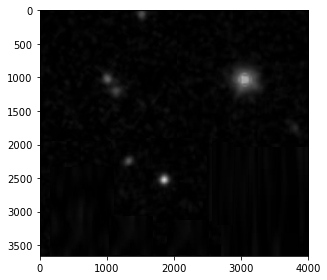

In [3]:
# Converting to grayscale helps in analysis by reducing the dimensions from 3 for RGB to 2 for grayscale.
gray_image = skimage.color.rgb2gray(image)
skimage.io.imsave('sky_grayscale.png', arr = gray_image)
skimage.io.imshow(gray_image)

In [4]:
gray_image.shape

(3660, 4004)

In [5]:
indices = np.argsort(-gray_image, axis = None)   # getting an array of indices such that the elements corresponding to 
                                                    # them are sorted in increasing order.

In [6]:
final = [np.unravel_index(indices[0], gray_image.shape)]  # First element of sorted array indices is the brightest point i.e. P1
count = 1
for i in indices:       # Loop to find P2 and P3
    j, k = np.unravel_index(i, gray_image.shape)          # this function returns the y and x coordinates in terms of pixel 
    flag = 0
    for v in final:     # Loop to make sure that P1, P2 and P3 are at least 200 pixels apart
        if abs(v[0]-j) > 200 and abs(v[1]-k) > 200:
            flag += 1
    if flag == len(final):       # Verifying if all the coordinates inside final have been compared with (j, k)
        final.append((j, k))
    if len(final) == 3:          # Exit the loop after finding the three brightest points
        break

final    

[(2519, 1854), (1000, 3015), (2254, 1325)]

In [7]:
# coordinates inside final are in the form of (y, x) as opposed to the convention of (x, y). On fixing that

bright = [(i[1], i[0]) for i in final]

# In skimage module x coordinate increases as we move from left to right in an image and y coordinate increases on moving
#from top to bottom, that means origin (0, 0) is at top left corner. Consider this while trying to see these points in the image

bright

[(1854, 2519), (3015, 1000), (1325, 2254)]

In [8]:
P1 = bright[0]
P2 = bright[1]
P3 = bright[2]
print('P1 is :', P1)
print('P2 is :', P2)
print('P3 is :', P3)

P1 is : (1854, 2519)
P2 is : (3015, 1000)
P3 is : (1325, 2254)


#### Now, cropping the image to a size of $512 \times 512$, around the brightest point. The cropped image is also in the 'image_processing' folder.

In [11]:
# We need to crop the image to a size of 512 X 512, with P1 at centre. This essentially means that x and y coordinates
# vary by 512/2 pixels around P1
512/2

256.0

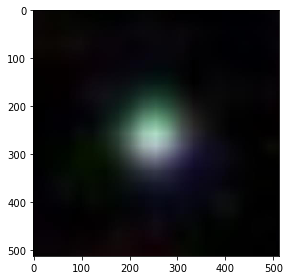

In [12]:
# We can crop the image around P1 by slicing

crop_img = image[P1[1] - 256 : P1[1] + 256, P1[0] - 256 : P1[0] +256]   #Varying y and x coordinates by 256 pixels from P1
skimage.io.imsave('crop_img.png', arr = crop_img)
skimage.io.imshow(crop_img)

#### Drawing *contour plot* and *3D Surface plot* for the cropped image.

In [13]:
# crop_img is of size 512 X 512 pixels. To draw contour plot and 3D surface plot, we will plot the 2D array of grayscaled  
# crop_image as a function of x and y coordinates

X = np.arange(0, 512)    # getting an array for x coordinates
Y = np.arange(0, 512)    # getting an array for y coordinates
X, Y = np.meshgrid(X, Y) # making 2D array from X and Y
crop_img_gray = skimage.color.rgb2gray(crop_img)     # Reason for grayscaling is to get a 2D array

###### Contour Plots

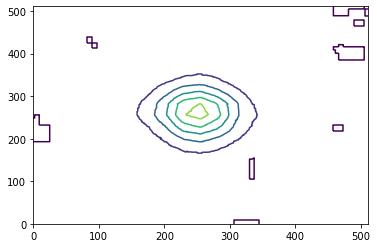

In [14]:
fig = plt.figure()
axes = fig.gca(projection = 'rectilinear')     # 2D contour plot
axes.contour(X, Y, crop_img_gray)
plt.show()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


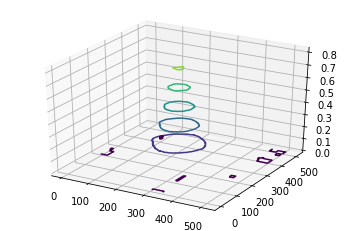

In [15]:
fig2 = plt.figure()
axes = fig2.gca(projection = '3d')       # 3D contour plot
axes.contour(X, Y, crop_img_gray)
plt.show()

##### 3D surface plot

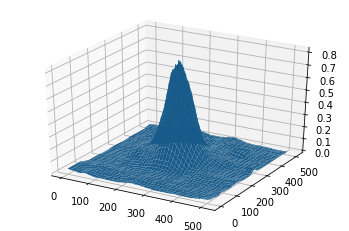

In [16]:
fig3 = plt.figure()
axes = fig3.gca(projection = '3d')
axes.plot_surface(X, Y, crop_img_gray)
plt.show()